In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/health-and-sleep-statistics/Health_Sleep_Statistics.csv


In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import stats

In [3]:
df = pd.read_csv('/kaggle/input/health-and-sleep-statistics/Health_Sleep_Statistics.csv')
df.head()

,User ID,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
0,1,25,f,8,23:00,06:30,8000,2500,medium,healthy,no,no
1,2,34,m,7,00:30,07:00,5000,2200,low,unhealthy,yes,yes
2,3,29,f,9,22:45,06:45,9000,2700,high,healthy,no,no
3,4,41,m,5,01:00,06:30,4000,2100,low,unhealthy,yes,no
4,5,22,f,8,23:30,07:00,10000,2800,high,medium,no,no


In [4]:
df.size

1200

In [5]:
df.columns

Index(['User ID', 'Age', 'Gender', 'Sleep Quality', 'Bedtime', 'Wake-up Time',
       'Daily Steps', 'Calories Burned', 'Physical Activity Level',
       'Dietary Habits', 'Sleep Disorders', 'Medication Usage'],
      dtype='object')

In [6]:
df.columns.size

12

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   User ID                  100 non-null    int64 
 1   Age                      100 non-null    int64 
 2   Gender                   100 non-null    object
 3   Sleep Quality            100 non-null    int64 
 4   Bedtime                  100 non-null    object
 5   Wake-up Time             100 non-null    object
 6   Daily Steps              100 non-null    int64 
 7   Calories Burned          100 non-null    int64 
 8   Physical Activity Level  100 non-null    object
 9   Dietary Habits           100 non-null    object
 10  Sleep Disorders          100 non-null    object
 11  Medication Usage         100 non-null    object
dtypes: int64(5), object(7)
memory usage: 9.5+ KB


In [8]:
df.describe()

,User ID,Age,Sleep Quality,Daily Steps,Calories Burned
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,50.500000,36.010000,7.000000,6830.000000,2421.00000
std,29.011492,8.454865,1.734964,2498.706736,281.06759
min,1.000000,22.000000,4.000000,3000.000000,2000.00000
25%,25.750000,28.750000,5.750000,4750.000000,2175.00000
50%,50.500000,35.000000,7.500000,6750.000000,2400.00000
75%,75.250000,44.000000,8.250000,9000.000000,2700.00000
max,100.000000,50.000000,9.000000,11000.000000,2900.00000


In [9]:
df.isna().sum()

User ID                    0
Age                        0
Gender                     0
Sleep Quality              0
Bedtime                    0
Wake-up Time               0
Daily Steps                0
Calories Burned            0
Physical Activity Level    0
Dietary Habits             0
Sleep Disorders            0
Medication Usage           0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.drop(["User ID"], axis = 1, inplace = True)

In [12]:
df

,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
0,25,f,8,23:00,06:30,8000,2500,medium,healthy,no,no
1,34,m,7,00:30,07:00,5000,2200,low,unhealthy,yes,yes
2,29,f,9,22:45,06:45,9000,2700,high,healthy,no,no
3,41,m,5,01:00,06:30,4000,2100,low,unhealthy,yes,no
4,22,f,8,23:30,07:00,10000,2800,high,medium,no,no
...,...,...,...,...,...,...,...,...,...,...,...
95,43,m,7,00:45,07:15,6500,2400,medium,medium,no,no
96,33,f,8,23:15,06:15,8500,2600,high,medium,no,no
97,46,m,4,01:30,07:00,3000,2000,low,unhealthy,yes,yes
98,25,f,9,22:15,06:45,9500,2700,high,healthy,no,no


# ****Age vs Sleep Quality analysis****

In [13]:
age_sleep_quality_corr = df[["Age", "Sleep Quality"]].corr()
age_sleep_quality_corr

,Age,Sleep Quality
Age,1.000000,-0.848356
Sleep Quality,-0.848356,1.000000


In [14]:
age_sleep_quality_corr["Age"]

Age              1.000000
Sleep Quality   -0.848356
Name: Age, dtype: float64

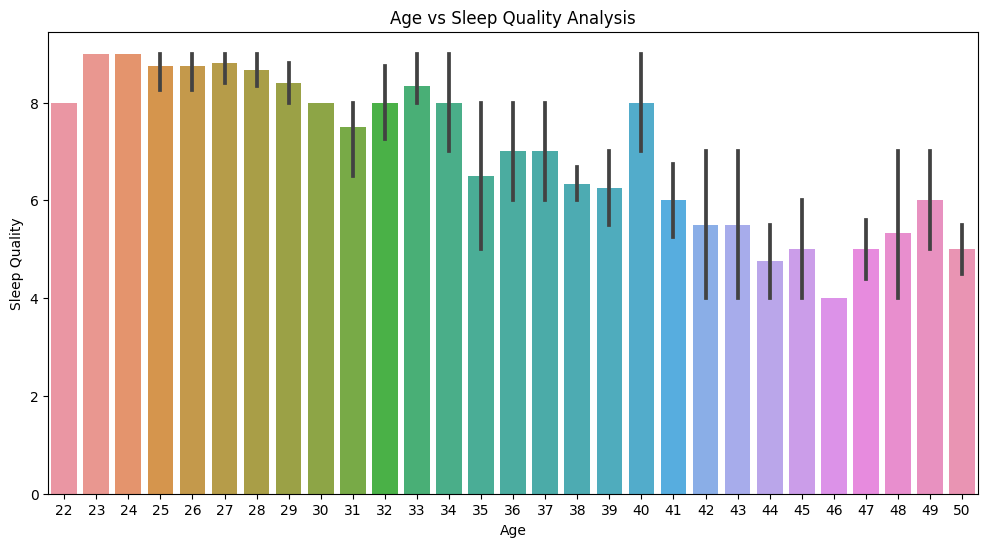

In [15]:
plt.figure(figsize = (12,6))
sns.barplot(x = "Age", y = "Sleep Quality", data = df)
plt.title("Age vs Sleep Quality Analysis")
plt.xlabel("Age")
plt.ylabel("Sleep Quality")
plt.show()

In [16]:
age_sleep_quality_model = LinearRegression()

x = df[["Age"]]
y = df[["Sleep Quality"]]

age_sleep_quality_model.fit(x,y)

LinearRegression()

In [17]:
age_sleep_quality_model.intercept_

array([13.26881202])

In [18]:
age_sleep_quality_model.coef_

array([[-0.17408531]])

In [19]:
age_sleep_quality_prediction = age_sleep_quality_model.predict(x)

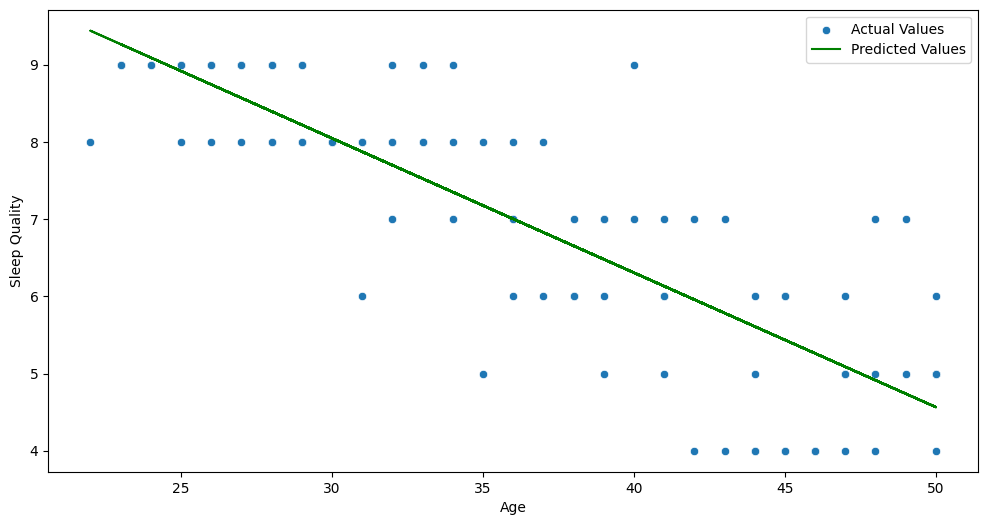

In [20]:
plt.figure(figsize = (12,6))
sns.scatterplot(x = "Age", y = "Sleep Quality", data = df, label = "Actual Values")
plt.plot(x, age_sleep_quality_prediction, color = "green", label = "Predicted Values")
plt.legend()
plt.show()

# **Physical Activity vs Sleep Quality**

In [21]:
df["Physical Activity Level"].head()

0    medium
1       low
2      high
3       low
4      high
Name: Physical Activity Level, dtype: object

In [22]:
df["Sleep Quality"].head()

0    8
1    7
2    9
3    5
4    8
Name: Sleep Quality, dtype: int64

In [23]:
df["Gender"].head()

0    f
1    m
2    f
3    m
4    f
Name: Gender, dtype: object

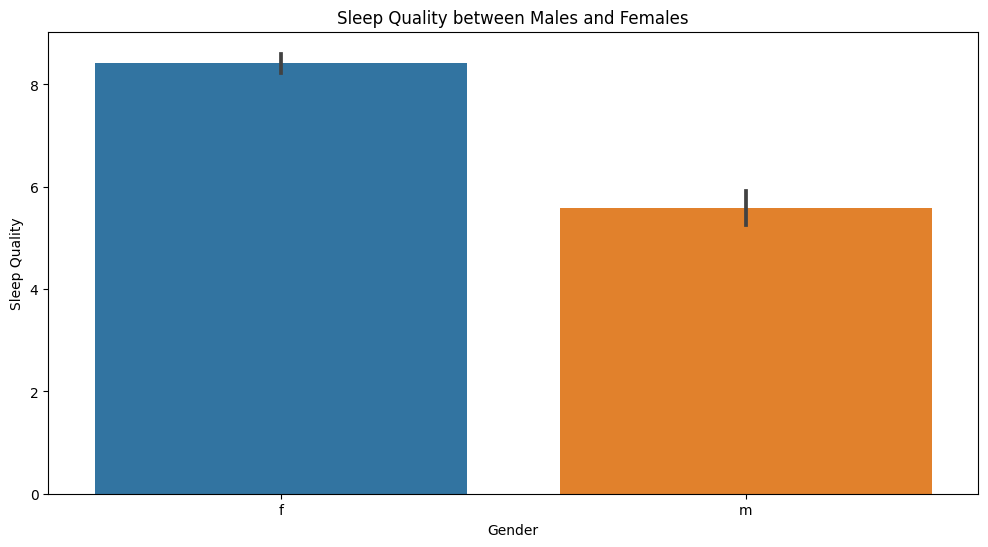

In [24]:
#Chart for Gender sleep quality 

plt.figure(figsize = (12,6))
sns.barplot(data = df, x = "Gender", y = "Sleep Quality")
plt.title("Sleep Quality between Males and Females")
plt.xlabel("Gender")
plt.ylabel("Sleep Quality")
plt.show()

Females have better sleep quality than Males

<Axes: xlabel='Physical Activity Level', ylabel='Sleep Quality'>

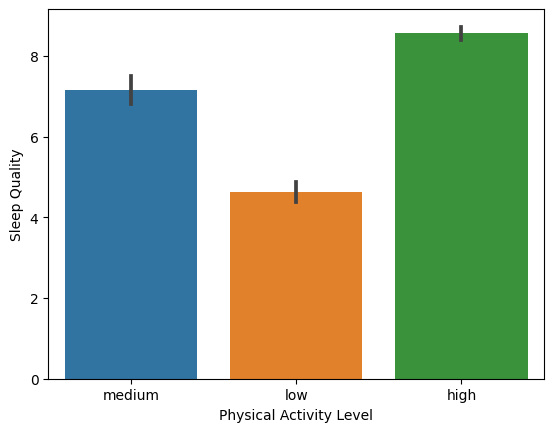

In [25]:
#Optional... 

sns.barplot(data = df, x = "Physical Activity Level", y = "Sleep Quality")

In [26]:
custom_codes = {"low": 1, "medium": 2, "high": 3}

df["Physical Activity Level"] = df["Physical Activity Level"].map(custom_codes)
df["Physical Activity Level"].head(10)

0    2
1    1
2    3
3    1
4    3
5    2
6    3
7    1
8    2
9    2
Name: Physical Activity Level, dtype: int64

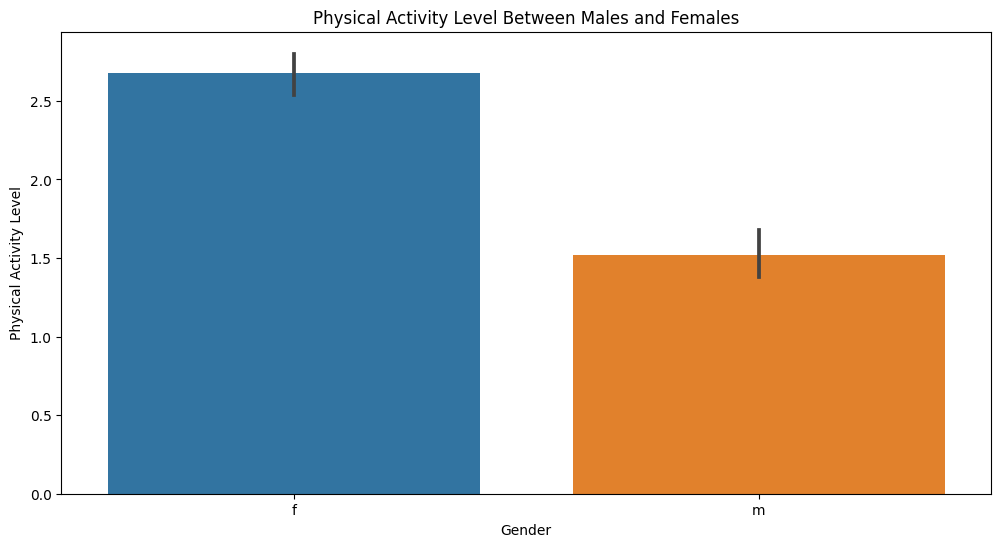

In [27]:
plt.figure(figsize = (12,6))
sns.barplot(data = df, x = "Gender", y = "Physical Activity Level")
plt.title("Physical Activity Level Between Males and Females")
plt.xlabel("Gender")
plt.ylabel("Physical Activity Level")
plt.show()

In [28]:
sleep_quality_males = df[df["Gender"] == "m"]["Sleep Quality"]
sleep_quality_females = df[df["Gender"] == "f"]["Sleep Quality"]

physical_activity_males = df[df["Gender"] == "m"]["Physical Activity Level"]
physical_activity_females = df[df["Gender"] == "f"]["Physical Activity Level"]

**Finding out t and p values for Sleep Quality vs Gender vs Physical Activity level**

In [29]:
t_sleep_quality, p_sleep_quality = stats.ttest_ind(sleep_quality_males, sleep_quality_females)

print(f"t_stats value for sleep Quality vs Gender : {t_sleep_quality:.2f}")
print(f"p_stats value for sleep Quality vs Gender : {p_sleep_quality:.2f}")

t_stats value for sleep Quality vs Gender : -14.32
p_stats value for sleep Quality vs Gender : 0.00


In [30]:
t_physical_activity, p_physical_activity = stats.ttest_ind(physical_activity_males, physical_activity_females)

print(f"t_stats value for sleep Quality vs Gender : {t_physical_activity:.2f}")
print(f"p_stats value for sleep Quality vs Gender : {p_physical_activity:.2f}")

t_stats value for sleep Quality vs Gender : -10.98
p_stats value for sleep Quality vs Gender : 0.00


In [31]:
df["Bedtime"].head(20)

0     23:00
1     00:30
2     22:45
3     01:00
4     23:30
5     00:15
6     22:30
7     01:30
8     23:00
9     00:45
10    01:00
11    22:00
12    23:30
13    01:30
14    22:15
15    00:30
16    23:45
17    01:15
18    22:30
19    00:45
Name: Bedtime, dtype: object

In [32]:
df["Wake-up Time"].head()

0    06:30
1    07:00
2    06:45
3    06:30
4    07:00
Name: Wake-up Time, dtype: object

In [33]:
def sleep_time_function(str_time):
    h = str_time.split(":")[0]
    m = str_time.split(":")[1]
    
    return int(h) + int(m)/60
df["Bedtime"] = df["Bedtime"].apply(sleep_time_function)
df["Wake-up Time"] = df["Wake-up Time"].apply(sleep_time_function)

df

,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
0,25,f,8,23.00,6.50,8000,2500,2,healthy,no,no
1,34,m,7,0.50,7.00,5000,2200,1,unhealthy,yes,yes
2,29,f,9,22.75,6.75,9000,2700,3,healthy,no,no
3,41,m,5,1.00,6.50,4000,2100,1,unhealthy,yes,no
4,22,f,8,23.50,7.00,10000,2800,3,medium,no,no
...,...,...,...,...,...,...,...,...,...,...,...
95,43,m,7,0.75,7.25,6500,2400,2,medium,no,no
96,33,f,8,23.25,6.25,8500,2600,3,medium,no,no
97,46,m,4,1.50,7.00,3000,2000,1,unhealthy,yes,yes
98,25,f,9,22.25,6.75,9500,2700,3,healthy,no,no


In [34]:
df["Sleep Duration Hours"] = (df["Wake-up Time"] - df["Bedtime"]) % 24
df["Sleep Duration Hours"]

0     7.5
1     6.5
2     8.0
3     5.5
4     7.5
     ... 
95    6.5
96    7.0
97    5.5
98    8.5
99    6.5
Name: Sleep Duration Hours, Length: 100, dtype: float64

In [35]:
df.head()

,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage,Sleep Duration Hours
0,25,f,8,23.00,6.50,8000,2500,2,healthy,no,no,7.5
1,34,m,7,0.50,7.00,5000,2200,1,unhealthy,yes,yes,6.5
2,29,f,9,22.75,6.75,9000,2700,3,healthy,no,no,8.0
3,41,m,5,1.00,6.50,4000,2100,1,unhealthy,yes,no,5.5
4,22,f,8,23.50,7.00,10000,2800,3,medium,no,no,7.5


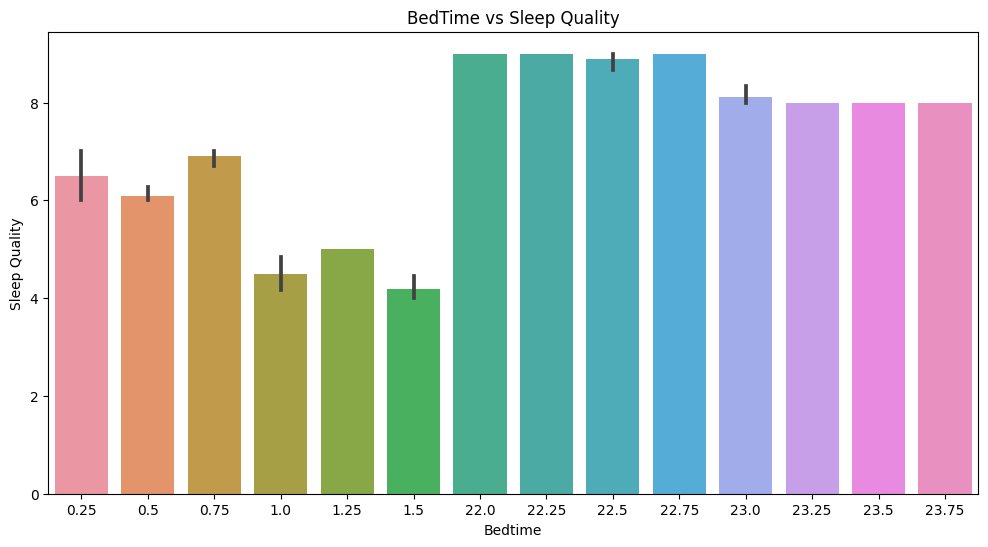

In [36]:
plt.figure(figsize = (12,6))
sns.barplot(data = df, x = "Bedtime", y = "Sleep Quality")
plt.title("BedTime vs Sleep Quality")
plt.xlabel("Bedtime")
plt.ylabel("Sleep Quality")
plt.show()

<Axes: xlabel='Wake-up Time', ylabel='Sleep Quality'>

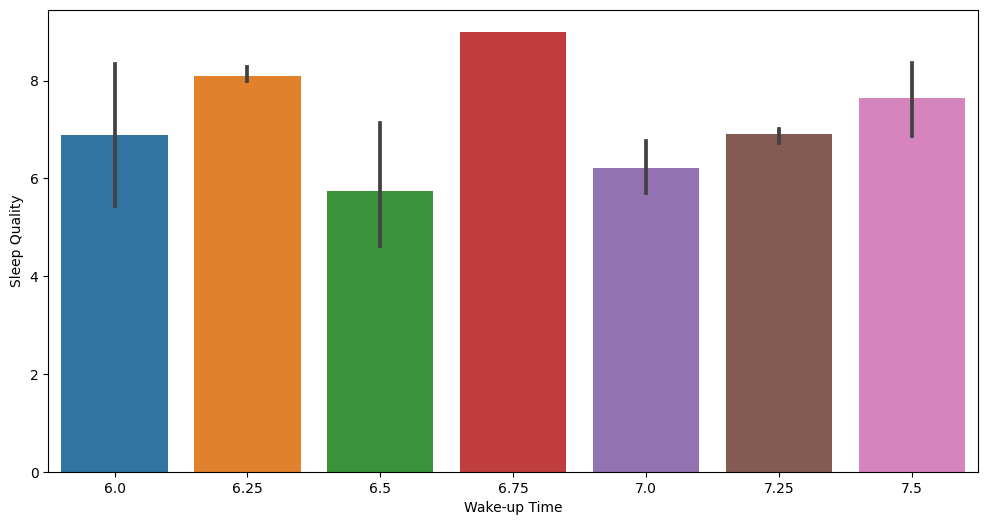

In [37]:
plt.figure(figsize = (12,6))
sns.barplot(data = df, x = "Wake-up Time", y = "Sleep Quality")

<Axes: xlabel='Sleep Duration Hours', ylabel='Sleep Quality'>

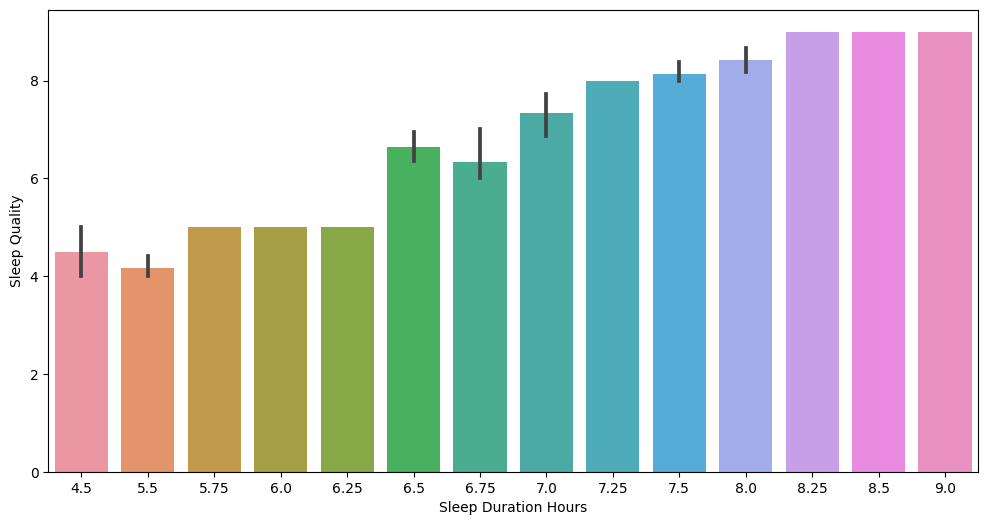

In [38]:
plt.figure(figsize = (12,6))
sns.barplot(data = df, x = "Sleep Duration Hours", y = "Sleep Quality")

In [39]:
sleep_duration_quality_model = LinearRegression()

x = df[["Sleep Duration Hours"]]
y = df[["Sleep Quality"]]

sleep_duration_quality_model.fit(x,y)

LinearRegression()

In [40]:
sleep_duration_quality_model.coef_

array([[1.36940999]])

In [41]:
sleep_duration_quality_model.intercept_

array([-2.57559935])

In [42]:
prediction = sleep_duration_quality_model.predict(x)

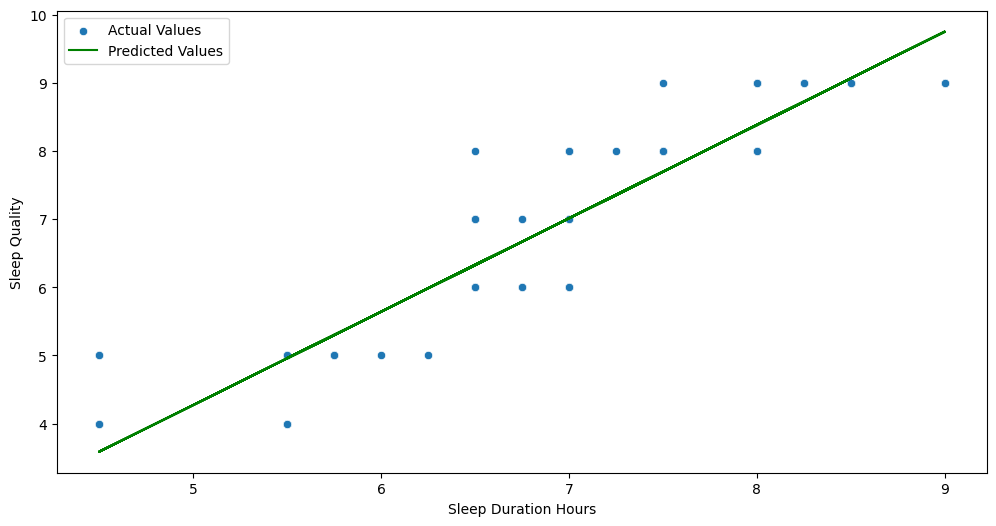

In [43]:
plt.figure(figsize = (12,6))
sns.scatterplot(data = df, x = "Sleep Duration Hours", y = "Sleep Quality", label = "Actual Values")
plt.plot(x, prediction, color = "green", label = "Predicted Values")
plt.legend()
plt.show()

# **Sleep Disorders vs Sleep Quality**

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


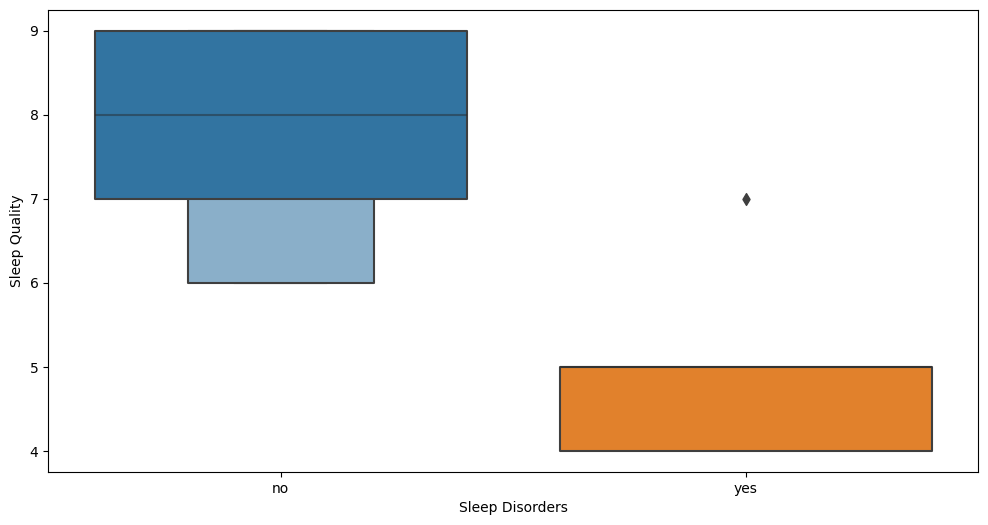

In [44]:
plt.figure(figsize = (12,6))
sns.boxenplot(data = df, x = "Sleep Disorders", y = "Sleep Quality")
plt.show()

In [45]:
df_numeric_features = df.select_dtypes(include = ["int64", "float64"])
df_numeric_features

,Age,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Sleep Duration Hours
0,25,8,23.00,6.50,8000,2500,2,7.5
1,34,7,0.50,7.00,5000,2200,1,6.5
2,29,9,22.75,6.75,9000,2700,3,8.0
3,41,5,1.00,6.50,4000,2100,1,5.5
4,22,8,23.50,7.00,10000,2800,3,7.5
...,...,...,...,...,...,...,...,...
95,43,7,0.75,7.25,6500,2400,2,6.5
96,33,8,23.25,6.25,8500,2600,3,7.0
97,46,4,1.50,7.00,3000,2000,1,5.5
98,25,9,22.25,6.75,9500,2700,3,8.5


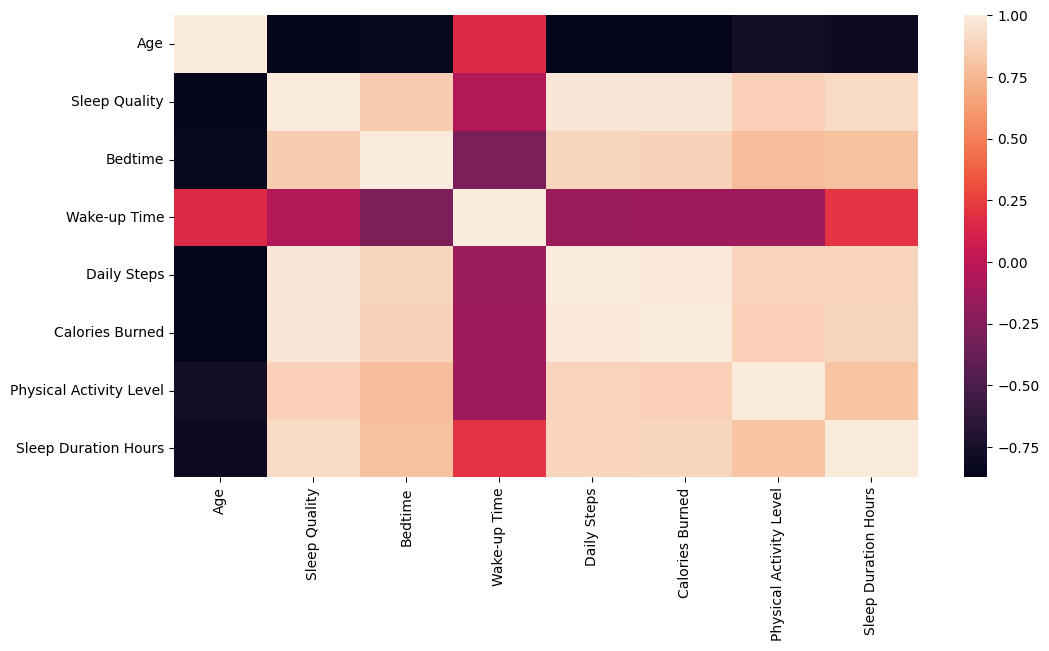

In [46]:
plt.figure(figsize = (12,6))
sns.heatmap(data = df_numeric_features.corr())
plt.show()